In [1]:
import bs4
import requests
from time import sleep
import matplotlib.pyplot as plt

In [2]:
def is_article(tag):
    return tag.has_attr('data-test-id') and tag['data-test-id']=='searchItem'
def is_abstract(tag):
    return tag.has_attr('data-abstract-type')# and tag['data-abstract-type']=='normal'

In [3]:
words = []

In [4]:
# TEST 
#thisurl = 'https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/spatiotemporal-proper-orthogonal-decomposition-of-turbulent-channel-flow/D24993B50A939B8FB6371EE26392FCAC'
#sp = bs4.BeautifulSoup(requests.get(thisurl).text,'html.parser')
#sp.find_all(is_abstract)[-1].find('p').text

In [5]:
def append_abstracts(articles_url,words):
    noabstr = []
    for article_url in articles_url:
        full_url = 'https://www.cambridge.org'+article_url
        #print(full_url)
        artpage = requests.get(full_url)
        artsoup = bs4.BeautifulSoup(artpage.text, 'html.parser')
        abstract = artsoup.find_all(is_abstract)
        if(len(abstract)==0):
            print(full_url)
            noabstr.append(full_url)
        else:
            pabstr = abstract[-1].find('p')
            if(pabstr==None):
                print(full_url)
                noabstr.append(full_url)
            else:
                words.extend(pabstr.text.split())
                #words.extend(pabstr.string.split())
        
        sleep(1)
    #print(len(noabstr)*1./len(articles_url))

In [32]:
def plot_freqs(words):
    h_words = {}
    for w in words:
        if w.isalpha():
            h_words[w.lower()] = h_words.get(w.lower(),0) + 1

    hsort = sorted(h_words.items(), key=lambda item: item[1])[::-1]
    hlist = hsort[:20]
    hx = [hs[0] for hs in hlist]
    hy = [hs[1] for hs in hlist]
    plt.figure(figsize=(20,10))
    plt.xticks(rotation=90)
    plt.bar(hx,hy)
    plt.show()
    return h_words

In [7]:
totpage = 100 # max is 1248
for pagenum in range(1,totpage+1):
    page = requests.get('https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/listing?aggs%5BproductTypes%5D%5Bfilters%5D=JOURNAL_ARTICLE&pageNum='+str(pagenum))
    soup = bs4.BeautifulSoup(page.text, 'html.parser')
    articles_url = [article.find('h5').find('a')['href'] for article in soup.find_all(is_article)]
    append_abstracts(articles_url,words)
    print(str(pagenum)+' out of '+str(totpage))

1 out of 1248
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/flm-volume-893-cover-and-front-matter/D25961C8FC37FC1F8B874E8C46AF5966
2 out of 1248
3 out of 1248
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/flm-volume-892-cover-and-front-matter/CD707E9977C26D02E244A16F6DE49775
4 out of 1248
5 out of 1248
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/flm-volume-891-cover-and-front-matter/AF99A9FD3224E81FE3D82F8A6DF56865
6 out of 1248
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/flm-volume-890-cover-and-front-matter/7A8FAA818E219587E2FD8962894ADD73
7 out of 1248
8 out of 1248
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/flm-volume-889-cover-and-front-matter/E96BFF8F9289A923B8B707D07244EB1E
9 out of 1248
10 out of 1248
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/flm-volume-888-cover-and-front-matter/5543C132803A1BC9

https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/flm-volume-863-cover-and-back-matter/D32A5821ADBAAFAB307E5E0A97E7107C
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/flm-volume-863-cover-and-front-matter/21CAEC2BFAA9456499932674764F6FCE
65 out of 1248
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/flm-volume-862-cover-and-front-matter/6130AAF375B1C8EEFAB23C694CCDD190
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/flm-volume-862-cover-and-back-matter/BD401A9649FB2286E66CA8F7B3DAA841
66 out of 1248
67 out of 1248
68 out of 1248
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/flm-volume-861-cover-and-back-matter/6B0BC2C4EA1DAF7F13EB994388816D10
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/flm-volume-861-cover-and-front-matter/331692D601081B9AE976A109438309F8
69 out of 1248
70 out of 1248
71 out of 1248
https://www.cambridge.

113 out of 1248
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/flm-volume-838-cover-and-back-matter/541539403A13A52052AC0DB69508971E
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/flm-volume-838-cover-and-front-matter/35FA6B66743AC680340778BD51BDDCE0
114 out of 1248
115 out of 1248
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/flm-volume-837-cover-and-back-matter/AC0C811A4F9110882EB178A3D02CD755
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/flm-volume-837-cover-and-front-matter/A52DB60F9CC0018EEBE62F9812FC7CAC
116 out of 1248
117 out of 1248
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/flm-volume-836-cover-and-back-matter/75CE52EE92B15326AC61817EC758126E
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/flm-volume-836-cover-and-front-matter/2E9155E092522917CA87C23657198596
118 out of 1248
https://www.cambridge.org/core/

157 out of 1248
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/flm-volume-814-cover-and-back-matter/21B22ED22BF2378435BF5503DB7D020A
158 out of 1248
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/flm-volume-813-cover-and-back-matter/E568A8C6FD82FB4890D79DFCF3B65806
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/flm-volume-813-cover-and-front-matter/BA26AA398AA910B9B74E9C62F6352E90
159 out of 1248
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/flm-volume-812-cover-and-front-matter/9DACE002B90D20E4B5855DD2C97D0A34
160 out of 1248
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/flm-volume-812-cover-and-back-matter/3071395C897D000D7322E91A5B79A95C
161 out of 1248
162 out of 1248
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/flm-volume-811-cover-and-front-matter/B2B5228472013D4E5D701E7D5B7C3DCB
https://www.cambridge.org/core/

https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/flm-volume-790-cover-and-back-matter/1C5164F08F67CCAF077D08D442A1E2E6
200 out of 1248
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/flm-volume-789-cover-and-back-matter/9930CD59A8A19108C1218BC9E91F5500
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/flm-volume-789-cover-and-front-matter/8ED6647FB167EEE369FED7C1823B2A6D
201 out of 1248
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/textco2-dissolution-in-a-background-hydrological-flow/8E2D83FB116DF116C8995E74AFB0663B
202 out of 1248
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/flm-volume-788-cover-and-front-matter/E16AF1B837B2AAFD77DABAF21759D2BA
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/flm-volume-788-cover-and-back-matter/6909332B2D57A5A350F64EA2370683EE
203 out of 1248
https://www.cambridge.org/core/journals/journal

234 out of 1248
235 out of 1248
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/flm-volume-766-cover-and-back-matter/6218BDCFC2D48F905AF7F9F228BF51F3
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/flm-volume-766-cover-and-front-matter/3D6C99D7F91935D12950139109512F8E
236 out of 1248
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/book-review/624249CF164B4F8300E815B82A673735
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/flm-volume-765-cover-and-back-matter/C64B64BB6EB3F391370F6D6B681BC377
237 out of 1248
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/flm-volume-765-cover-and-front-matter/5BC45435103AAE250569EA92E4192000
238 out of 1248
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/flm-volume-764-cover-and-front-matter/FA6CF906AA0ED425379935333994A96D
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/artic

https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/flm-volume-741-cover-and-back-matter/1623A202F19F13075ED8A0A63DD1DDB0
275 out of 1248
276 out of 1248
277 out of 1248
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/flm-volume-740-cover-and-front-matter/FCE05CB2B67A8FD90F97B68D3DCC98A9
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/flm-volume-740-cover-and-back-matter/75370079DB09D425F4F88057940D9946
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/flm-volume-739-cover-and-back-matter/E7D28D17843475EDCAA599FDF5426C33
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/flm-volume-739-cover-and-front-matter/79CF7713952B6AF99DA7798762C2B0D7
278 out of 1248
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/flm-volume-738-cover-and-back-matter/C30A5034BFB0BFF697FA8B2D29F22EA9
https://www.cambridge.org/core/journals/journal-of-fluid-mechani

311 out of 1248
312 out of 1248
313 out of 1248
314 out of 1248
315 out of 1248
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/flm-volume-715-cover-and-back-matter/C35792CE666B5645A4377EA00BA924AE
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/flm-volume-715-cover-and-front-matter/24CB31349E66F4165FA31BBE697E23B1
316 out of 1248
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/flm-volume-714-cover-and-front-matter/8428DD9D9AFC0349EF231F421E456365
317 out of 1248
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/flm-volume-714-cover-and-back-matter/0D65E12EA13F225913EC0933BD10FD4A
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/flm-volume-713-issue-1-cover-and-front-matter/A09596036E2D0D0D8A5E0EAF34711A23
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/flm-volume-713-issue-1-cover-and-back-matter/5550329DD9A16FC201414C7B1F68AC51

343 out of 1248
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/advanced-mathematics-for-applications-by-andrea-prosperetti-cambridge-university-press-new-york-2011-724-pages-isbn-9780521515320-hardback-isbn-9780521735872-paperback/044DD8BF63FFAAE01B8497E3CD05944B
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/flm-volume-691-cover-and-back-matter/CEA734E24ECE5180580AE13527513196
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/flm-volume-691-cover-and-front-matter/AE8A2967A79AACC89DDF90D29D75B6FE
344 out of 1248
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/flm-volume-690-cover-and-back-matter/4CB890ABBCCD7FE90B627B74B302B05C
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/flm-volume-690-cover-and-front-matter/28A39E1BD2096A49AFAEAF683E3ECDD4
345 out of 1248
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/flm-volume-689-cove

ConnectionError: ('Connection aborted.', OSError(0, 'Error'))

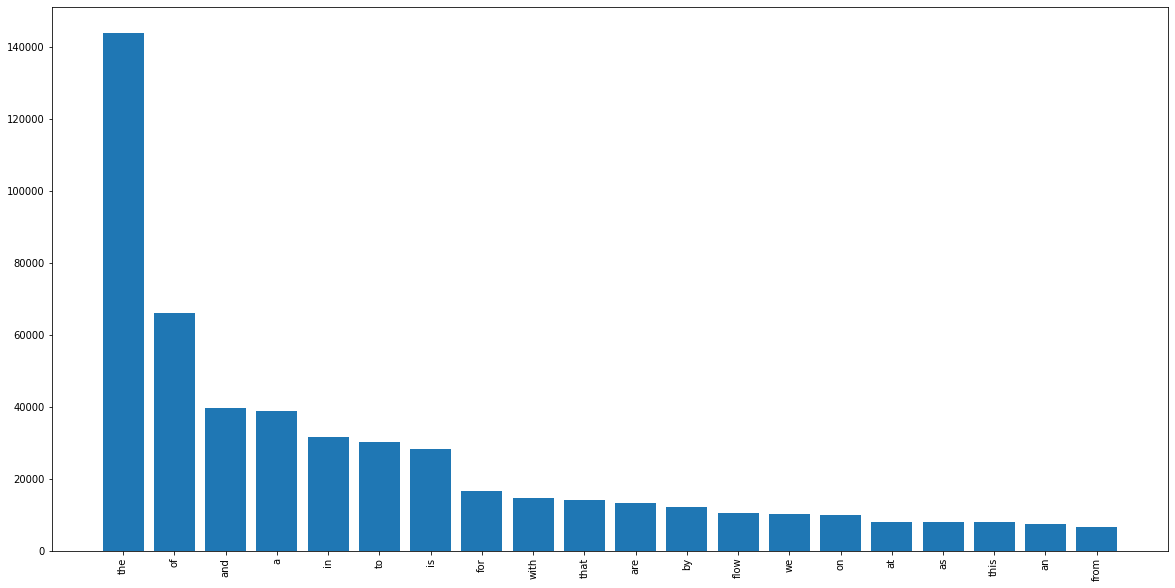

In [33]:
freqs = plot_freqs(words)

In [37]:
freqs['and']

39650